In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [26]:
# Downloads the MNIST handwritten digit dataset (if not already cached locally)
# URL: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
# Grayscale vs Color:
# MNIST = Grayscale Images:
# 1 channel (hence the "1" in input_shape = (28, 28, 1))
# Black and white handwritten digits
# Each pixel has one intensity value (0-255)
# If it were Color Images:
# 3 channels (RGB: Red, Green, Blue)
# Input shape would be (28, 28, 3)
# Each pixel would have three values (R, G, B)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
# Check the dimensions (shapes) of the loaded datasets with meaningful print statements
print("MNIST Dataset Information:")
print("=" * 40)
print(f"Training images shape: {x_train.shape}")
print(f"  - Number of training images: {x_train.shape[0]:,}")
print(f"  - Image dimensions: {x_train.shape[1]} x {x_train.shape[2]} pixels")
print()
print(f"Training labels shape: {y_train.shape}")
print(f"  - Number of training labels: {y_train.shape[0]:,}")
print()
print(f"Test images shape: {x_test.shape}")
print(f"  - Number of test images: {x_test.shape[0]:,}")
print(f"  - Image dimensions: {x_test.shape[1]} x {x_test.shape[2]} pixels")
print()
print(f"Test labels shape: {y_test.shape}")
print(f"  - Number of test labels: {y_test.shape[0]:,}")
print("=" * 40)

MNIST Dataset Information:
Training images shape: (60000, 28, 28)
  - Number of training images: 60,000
  - Image dimensions: 28 x 28 pixels

Training labels shape: (60000,)
  - Number of training labels: 60,000

Test images shape: (10000, 28, 28)
  - Number of test images: 10,000
  - Image dimensions: 28 x 28 pixels

Test labels shape: (10000,)
  - Number of test labels: 10,000


In [17]:
# Reshape data to add channel dimension for CNN compatibility
# Convert from (samples, height, width) to (samples, height, width, channels)
# Before: x_train.shape = (60000, 28, 28) - 3D array
# After: x_train.shape = (60000, 28, 28, 1) - 4D array with 1 channel (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define input shape for CNN model: (height, width, channels)
input_shape = (28, 28, 1)

In [18]:
print(f"Data type of x_train: {x_train.dtype}")
print(f"Data type of x_test: {x_test.dtype}")
print(f"Data type of y_train: {y_train.dtype}")
print(f"Data type of y_test: {y_test.dtype}")

# Convert from uint8 (0-255) to float32 for neural network compatibility
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Data type of x_train: float32
Data type of x_test: float32
Data type of y_train: uint8
Data type of y_test: uint8


In [20]:
# Add this comment to clarify:
# Normalize grayscale pixel intensities from 0-255 to 0.0-1.0 range
# 0→0.0 (white/no ink), 128→0.502 (gray), 255→1.0 (black/full ink)
x_train /= 255
x_test /= 255

In [ ]:
# Build CNN model architecture with sequential flow explanation
print("Building CNN Model - Sequential Flow:")
print("=" * 50)

model = Sequential()

print("1. Input Layer: (28, 28, 1) - Grayscale images")
model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape=input_shape))
print("2. Conv2D Layer: 28 filters/channel depth(enhance the image information), 3x3 kernel, ReLU activation → Output: (26, 26, 28)") #Most CNNs use 3×3 (VGG, ResNet, etc.)
print("   Why 26x26? (28-3+1) = 26 (no padding)")

model.add(MaxPooling2D(pool_size=(2, 2)))
print("3. MaxPooling2D: 2x2 pool → Output: (13, 13, 28)")
print("   Why 13x13? 26/2 = 13 (downsampling)")

model.add(Flatten())
print("4. Flatten: Convert 2D to 1D → Output: (4732,)")
print("   Why 4732? 13 × 13 × 28 = 4732 neurons")

model.add(Dense(128, activation='relu'))
print("5. Dense Layer: 128 neurons with ReLU activation")

model.add(Dropout(0.2))
print("6. Dropout: Randomly drop 20% of neurons (prevent overfitting)")

model.add(Dense(10, activation='softmax'))
print("7. Output Layer: 10 neurons (digits 0-9) with Softmax")

print("=" * 50)
print("Data Flow: 28×28×1 → 26×26×28 → 13×13×28 → 4732 → 128 → 10")
print("=" * 50)

# Display model architecture
model.summary()

Building CNN Model - Sequential Flow:
1. Input Layer: (28, 28, 1) - Grayscale images
2. Conv2D Layer: 28 filters, 3x3 kernel → Output: (26, 26, 28)
   Why 26x26? (28-3+1) = 26 (no padding)
3. MaxPooling2D: 2x2 pool → Output: (13, 13, 28)
   Why 13x13? 26/2 = 13 (downsampling)
4. Flatten: Convert 2D to 1D → Output: (4732,)
   Why 4732? 13 × 13 × 28 = 4732 neurons
5. Dense Layer: 128 neurons with ReLU activation
6. Dropout: Randomly drop 20% of neurons (prevent overfitting)
7. Output Layer: 10 neurons (digits 0-9) with Softmax
Data Flow: 28×28×1 → 26×26×28 → 13×13×28 → 4732 → 128 → 10


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#https://keras.io/api/optimizers/
# Each epoch:
# 1. Model makes predictions on training images
# 2. Compares predictions with actual labels (loss calculation)
# 3. Adjusts weights using Adam optimizer (backpropagation)
# 4. Reports accuracy improvement
# Configure model for training - Adam optimizer with crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model for 10 epochs on 60,000 training images
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.8536 - loss: 0.8102
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9241 - loss: 0.2693
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 68ms/step - accuracy: 0.9421 - loss: 0.2064
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 186s 91ms/step - accuracy: 0.9498 - loss: 0.1814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 54ms/step - accuracy: 0.9543 - loss: 0.1623
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9576 - loss: 0.1566
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 15ms/step - accuracy: 0.9601 - loss: 0.1446
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9631 - loss: 0.1383
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9637 - loss: 0.1376
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9648 - loss: 0.1319


In [30]:
# Evaluate trained model performance on unseen test data (10,000 images)
# Returns [test_loss, test_accuracy] - how well model performs on new data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nFinal Test Results:")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9648 - loss: 0.1848

Final Test Results:
Test Accuracy: 0.9648 (96.48%)
Test Loss: 0.1848


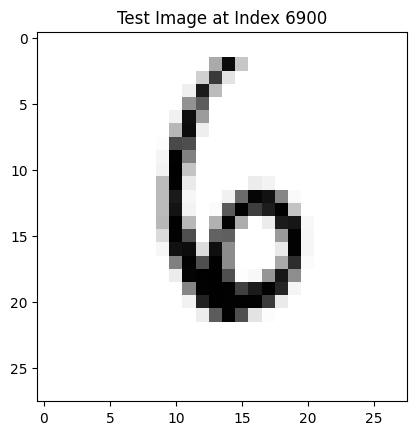

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted digit: 6
Actual digit: 6
Prediction confidence: 1.0000 (100.00%)


In [33]:
# Visualize and test a single prediction from the test dataset
import matplotlib.pyplot as plt

# Select a specific test image (index 6900) to visualize and predict
image_index = 6900

# Display the selected test image as grayscale
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
plt.title(f"Test Image at Index {image_index}")
plt.show()

# Prepare image for prediction (reshape to match model input: batch_size=1, height=28, width=28, channels=1)
predict_image = x_test[image_index].reshape(1, 28, 28, 1)

# Make prediction using trained model - returns probability distribution for all 10 digits
pred = model.predict(predict_image)

# Get the predicted digit (highest probability class)
predicted_digit = pred.argmax()
print(f"Predicted digit: {predicted_digit}")
print(f"Actual digit: {y_test[image_index]}")
print(f"Prediction confidence: {pred[0][predicted_digit]:.4f} ({pred[0][predicted_digit]*100:.2f}%)")

In [35]:
# Create confusion matrix to analyze model performance across all digit classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Make predictions on entire test set (10,000 images)
print("Making predictions on test set...")
y_pred = model.predict(x_test)                    # Get probability predictions
y_pred_classes = np.argmax(y_pred, axis=1)        # Convert probabilities to class labels (0-9)

# Step 2: Create confusion matrix
print("Creating confusion matrix...")
cm = confusion_matrix(y_test, y_pred_classes)     # Compare actual vs predicted labels

# Step 3: Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
           annot=True,           # Show numbers in cells
           fmt='d',              # Display as integers
           cmap='Blues',         # Blue color scheme
           xticklabels=range(10), # X-axis labels (0-9)
           yticklabels=range(10)) # Y-axis labels (0-9)
plt.title('Confusion Matrix - MNIST Digit Classification')
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.show()

# Step 4: Print detailed classification metrics
print("\nClassification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Step 5: Calculate per-class accuracy
print("\nPer-Class Accuracy:")
print("=" * 30)
for i in range(10):
    # Diagonal elements = correct predictions for each digit
    correct_predictions = cm[i, i]
    # Row sum = total actual instances of each digit
    total_actual = np.sum(cm[i, :])
    # Calculate accuracy for this digit
    class_accuracy = correct_predictions / total_actual
    print(f"Digit {i}: {correct_predictions:4d}/{total_actual:4d} = {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

Making predictions on test set...


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=uint8)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>